<h1 style="text-align: center;">Factors Affecting Attrition.</h1>
<h3 style="text-align: center;"><b>By: Ibrahim Olayiwola</b></h3>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limit">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
<h2 style="text-align: center;">Introduction</h2>

### What is Attrition.
From [Gartner](https://www.gartner.com/en/human-resources/glossary/attrition#:~:text=Attrition%20is%20the%20departure%20of,%2C%20termination%2C%20death%20or%20retirement.), attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement.

Many factors can lead to attrition, this may include, a better offer from another company, natural disasters, relocation of employees etc. 

This project aims to answer some questions regarding attrition in an unidentified company. The questions the projects tries to answer includes;

- What are the three main factors behind employee attrition?
- What is the relationship between education and monthly income?
- What is the effect of age on attrition?
- Is income a main factor in employee attrition?
- How does work-life balance impact on employee attrition?

The dataset is a database of a company's employees. It also contains the attrition data of the employees. SQL was used to extract the data from the database, and it was passed into a pandas dataframe. Some columns were assessed. 


There are 36 columns in the dataset. They are:
- Age: Age of employee.
- Attrition: Did an employee leave the company or not?
- BusinessTravel: Do the employee travel for work purposes?
- DailyRate:
- Department: Department employee works.
- DistanceFromHome: Distance of workplace from employee's home.
- Education: Level of education of employee.
- EducationField: Field of study of employee.
- EmployeeCount: Number of employee with this employee number.
- EmployeeNumber: ID number of employee.
- EnvironmentSatisfaction: Environment satisfaction of employee.
- Gender: Gender of employee.
- HourlyRate:
- JobInvolvement: How involved is the employee with his/her work?
- JobLevel: Level of employee.
- JobRole: Employee's job role
- JobSatisfaction: Job satisfaction level.
- MaritalStatus: Employee's marital status.
- MonthlyIncome: Employee's monthly income.
- MonthlyRate
- NumCompaniesWorked: Number of companies employee has worked.
- Over18: Is the employee over 18 years of age?
- OverTime: Does the employee work overtime?
- PercentSalaryHike: Percentage of salary hike.
- PerformanceRating: Performance rating of employee.
- RelationshipSatisfaction: Employee's relationship satisfaction with significant other.
- StandardHours: Working hours in a week.
- StockOptionLevel: Employee stock option.
- TotalWorkingYears: Total number of years an employee has worked.
- TrainingTimesLastYear: Hours spent on training last year.
- WorkLifeBalance: Level of work life balance.
- YearsAtCompany: Number of years at company.
- YearsInCurrentRole: Number of years in current role.
- YearsSinceLastPromotion: Number of years since last promotion.
- YearsWithCurrManager: Number of years with current manager.

<a id='wrangling'></a>
<h2 style="text-align: center;">Data Wrangling</h2>

In this section of the report, I loaded the data, check for cleanliness, and then trimmed and cleaned the dataset for analysis.

In [1]:
# Import sqlite library
import sqlite3

# Import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Check if package imported successfully
print('Package imported successfully')

Package imported successfully


In [3]:
# Connect to database
connect = sqlite3.connect("attr_data.db")

# Check if DB is created
print("Connected to DB successfully",  type(connect))

Connected to DB successfully <class 'sqlite3.Connection'>


In [4]:
# Create a cursor object---cursor is used to run queries
cursor = connect.cursor()

# Check if cursor object is created successfully
print("Cursor object created successfully \n", type(cursor))

Cursor object created successfully 
 <class 'sqlite3.Cursor'>


In [5]:
# View table names
query = """
SELECT name
FROM sqlite_schema
WHERE type = 'table';
"""

# execute query
cursor.execute(query)

# View result
query_result = cursor.fetchall()
query_result

[('attrition_records',), ('sqlite_sequence',)]

In [6]:
# Select all from the sqlite_sequence
query = """
SELECT *
FROM sqlite_sequence"""

# execute
cursor.execute(query)

# Output the query
query_output = cursor.fetchall()
query_output

[('attrition_records', 1470)]

In [7]:
df = pd.read_sql_query("SELECT * FROM attrition_records", connect)


In [8]:
# View first 5 rows in the dataset
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### Assessing the Dataset

In [9]:
# The number of rows and columns of the dataset
df.shape

(1470, 36)

There are 1470 rows, 36 columns in the dataset.

In [10]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

**From the information above, we can see the following:**

- There are no missing values in the dataset.
- There are only integers and string(object) datatypes.
- The column names will have to be formatted to conform with snake case

In [11]:
# Are there duplicates in the dataset?
sum(df.duplicated())

0

From the above cell, it is noticed that there are no duplicates in the datasets.

In [12]:
# Unique values in the dataset
df.nunique()

id                          1470
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTi

We can confirm that there are not duplicate in the main columns that doesn't need duplicates, the **`id`** column and the **`EmployeeNumber`** column.

In [13]:
# Confirming number of empty rows in the dataset is zero
df.isna().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

There are no empty rows in the dataset.

In [14]:
# Checking the datatypes of the columns
df.dtypes

id                           int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [15]:
# Checking the summary statistics
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Assesing the `Age` Column.

This column tells the age of the employees in the database. 

In [16]:
# A sample of the age column
df.Age.sample(5)

963     38
1315    36
1134    35
453     26
523     50
Name: Age, dtype: int64

From the above cells, 
- The datatype of the age column is integer.
- There are no missing rows.
- The minimum and maximum age of 18 and 60 corresponds with working class age.

**Nothing is to be done to clean the `age` column except modify the column name to snake_case.**

#### Assesing the `Attrition` Column.

The attrition column tells us whether an employee left the company of not. The reason an employee leaves the company is not taken into consideration.

In [17]:
# A sample of how the column looks like
df.Attrition.sample(5)

461      No
1421     No
365      No
1425     No
947     Yes
Name: Attrition, dtype: object

In [18]:
# Number of unique values in the column
df.Attrition.nunique()

2

There are two unique values in the column.

In [19]:
# The unique values in the column
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

**There are only two values in the dataset;**
- Yes _and_
- No

**This could be changed to boolean datatype values of**
- True _and_
- False

#### Assesing the `BusinessTravel` Column.

This column gives an employee travel information for work purposes.

In [20]:
# The basic information about the column
df.BusinessTravel.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: BusinessTravel
Non-Null Count  Dtype 
--------------  ----- 
1470 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB


In [21]:
# A sample of the column
df.BusinessTravel.sample(5)

1080        Travel_Rarely
1156        Travel_Rarely
22          Travel_Rarely
339         Travel_Rarely
1012    Travel_Frequently
Name: BusinessTravel, dtype: object

There are different values in the column, more investigation is needed to check the unique values

In [22]:
# The number of unique values in the column
df.BusinessTravel.nunique()

3

There are three unique values in the column.

In [23]:
# Getting the uniqe values
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

The three unique values in the column are
- Travel_Rarely
- Travel_Frequently
- Non-Travel

**The only cleaning this column need is to modify the column name to snake_case format**

#### Assesing the `DailyRate` Column.

This column will need more investigation to know what it is about.

In [24]:
# Basic information about the column
df.DailyRate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: DailyRate
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB


In [25]:
# A sample of how the column looks like
df.DailyRate.sample(5)

1035    1398
315      185
526      408
972     1124
877      150
Name: DailyRate, dtype: int64

In [26]:
# Summary statistics of th3 'DailyRate' column
df.DailyRate.describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

**The DailyRate column is not detailed enough to know what the column is about, it might be dropped.
The only cleaning is to convert the column name to snake_case format.**

#### Assesing the `Department` Column

This column gives information on which department of the company the employee works

In [27]:
# Basic information about the column
df.Department.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Department
Non-Null Count  Dtype 
--------------  ----- 
1470 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB


In [28]:
# A sample of how the column looks like
df.Department.sample(5)

786     Research & Development
1109                     Sales
1448                     Sales
314     Research & Development
1453                     Sales
Name: Department, dtype: object

In [29]:
# The number of unique values in the column.
df.Department.nunique()

3

here are three unique values in the column, the next cell will shed more info about the different departments.

In [30]:
# Unique values in the 'Department' column
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

There are three departments where employee works. They are
- Sales
- Research & Development
- Human Resources.

**No cleaning is required for this column.**

#### Assesing the `DistanceFromHome` Column

This column gives the distance the workplace is from an employee's home.

In [31]:
# A sample of the column
df.DistanceFromHome.head()

0    1
1    8
2    2
3    3
4    2
Name: DistanceFromHome, dtype: int64

The distance does not give the measurement unit, It might be miles, meters, kilometers etc.

In [32]:
# Summary staticstic of the column
df.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

The max distance is 29, the median is 7. From intuition, we can exclude extreme measurement for the distance. This include miles and kilometeres. Meters will be used.

Another factor for using metres is that the universally accepted unit for distance is meters.

#### Assesing the `Education` Column

This column gives the level of education of an employee

In [33]:
# A sample of the dataset
df.Education.sample(5)

317    4
681    3
755    2
631    4
61     5
Name: Education, dtype: int64

The education column is in integers, and one of the supervisors provided us with the following on values of this column.
- "1": "Below College"
- "2": "College"
- "3": "Bachelor"
- "4": "Master"
- "5": "Doctor"

**From this, it can be said that there are 5 unique values in the dataset and apart from changing the format of the column name, it might be needed to change the values to more reflective or descriptive.**

#### Assesing the `EducationField` Column

This column gives information about the field of study of employees

In [34]:
# A sample of the column. 
df.EducationField.sample(5)

7      Life Sciences
714          Medical
261    Life Sciences
67     Life Sciences
507          Medical
Name: EducationField, dtype: object

In [35]:
# Number of unique values of the column.
df.EducationField.nunique()

6

**There are 6 unique values in this column and there's no cleaning needed except to change the column name format.**

#### Assesing the `EmployeeCount` Column,

In [36]:
# A sample of the column.
df.EmployeeCount.sample(3)

1271    1
789     1
1239    1
Name: EmployeeCount, dtype: int64

In [37]:
# Re checking the summary statistics of the column.
df.EmployeeCount.describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

**It seems the column is a count of the `id` in the dataset. This column is not needed, it will be dropped.**

#### Assesing the `EmployeeNumber` Column.

**This is the unique number of an Employee. It is like an Id. This column does not need any analysis it will be dropped as the id column can be used in its place.**

#### Assesing the `EnvironmentalSatisfaction` Column.

This column gives information about an employee's satisfaction with the environment. More information was given about this column.

The education column is in integers, and one of the supervisors provided us with the following on values of this column.
- "1": "Low"
- "2": "Medium"
- "3": "High"
- "4": "Very High"

**From this, it can be said that there are 4 unique values in the dataset and apart from changing the format of the column name, it might be needed to change the values to more reflective or descriptive.**

Let's check the unique value in the dataset to make sure there's no need to clean anything apart from the above.

In [38]:
# Unique values in EnvironmentSatisfaction column
df.EnvironmentSatisfaction.unique()

array([2, 3, 4, 1], dtype=int64)

There are only 4 unique values, so the cleaning required is the one stated above.

#### Assesing the `Gender` Column.

This column gives the gender of an employee. There should be only two columns in the dataset.

In [39]:
# A sample of the column
df.Gender.sample(3)

546       Male
1454    Female
659       Male
Name: Gender, dtype: object

In [40]:
# The number of unique values in the column
df.Gender.nunique()

2

**There are two unique values, and this column does not need any cleaning except modifying its column name.**

#### Assesing the `HourlyRate` and `MonthlyRate` Columns.

The column names beg the question: rate of what? They are not descriptive enough.

The columns might be dropped.

#### Assesing the `JobInvolvement` Column.

This column gives information about an employee's job involvement. More information was given about this column.

This column is in integers, and one of the supervisors provided us with the following on values of this column.
- "1": "Low"
- "2": "Medium"
- "3": "High"
- "4": "Very High"

**From this, it can be said that there are 4 unique values in the dataset and apart from changing the format of the column name, it might be needed to change the values to more reflective or descriptive.**

Let's check the unique value in the dataset to make sure there's no need to clean anything apart from the above.

In [41]:
# Unique values in JobInvolvement column
df.JobInvolvement.unique()

array([3, 2, 4, 1], dtype=int64)

The column has four unique numbers, therefore the only cleaning necessary is what is stated above.

#### Assesing the `JobLevel` Column.

This column is about the level of heirarchy of an employee.

In [42]:
# A sample of the column
df.JobLevel.sample(3)

513    1
236    1
779    1
Name: JobLevel, dtype: int64

In [43]:
# Getting the number of unique values in the dataset
df.JobLevel.nunique()

5

In [44]:
# The unique values in the column
df.JobLevel.unique()

array([2, 1, 3, 4, 5], dtype=int64)

No information was given about this, however from previous numerical equivalent of levels, it can be said that the least level is 1, and the max level is 5.

**The column name will be formatted to snake_case.**

#### Assesing the `JobRole` Column.

This column gives information about the role of an employee.

In [45]:
# A sample of the column
df.JobRole.sample(3)

1349        Research Scientist
198     Manufacturing Director
661     Manufacturing Director
Name: JobRole, dtype: object

In [46]:
# The number of unique data in the column
df.JobRole.nunique()

9

There are nine unique job roles in the dataset.

What are they?

In [47]:
# The unique job roles in the dataset.
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

The unique job roles are:
- Sales Executive
- Research Scientist
- Laboratory Technician
- Manufacturing Director
- Healthcare Representative
- Manager
- Sales Representative
- Research Director
- Human Resources

**No cleaning is needed except to change the format of the column name.**

#### Assesing the `JobSatisfaction` Column.

This column gives the satisfaction level of an employee to his/her job.
This column is in integers, and one of the supervisors provided us with the following on values of this column.
- "1": "Low"
- "2": "Medium"
- "3": "High"
- "4": "Very High"

**From this, it can be said that there are 4 unique values in the dataset and apart from changing the format of the column name, it might be needed to change the values to more reflective or descriptive.**

Let's check the unique value in the dataset to make sure there's no need to clean anything apart from the above.

In [48]:
# Unique values in the dataset
df.JobSatisfaction.unique()

array([4, 2, 3, 1], dtype=int64)

The column has four unique numbers, therefore the only cleaning necessary is what is stated above.

#### Assesing the `MaritalStatus` Column.

This column tells us about the marital status of an employee.

In [49]:
# A sample of the column
df.MaritalStatus.sample(3)

968     Married
1237     Single
843     Married
Name: MaritalStatus, dtype: object

In [50]:
# Number of unique values in the column
df.MaritalStatus.nunique()

3

There are three unique values in the column, let's see what they are.

In [51]:
# Unique values in the column
df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

The three values are:
- Married
- Single 
- Divorced.

**The only cleaning required is the general cleaning of formatting the column names.**

#### Assesing the `MonthlyIncome` Column.

This column gives the monthly income of the employees.

In [52]:
# The top 5 entries of the column
df.MonthlyIncome.head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int64

In [53]:
# Summary statistics of the column.
df.MonthlyIncome.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

**The column name format will be changed to snake_case.**

#### Assesing the `NumCompaniesWorked` Column.

This answers the the question "how many companies has this employee worked for?"

In [54]:
# Sample of the column
df.NumCompaniesWorked.sample(3)

91      0
1370    8
667     4
Name: NumCompaniesWorked, dtype: int64

**The column name will be formatted and nothing else will be done.**

#### Assesing the `Over18` Column.

More information is needed to know what this column is about.

In [55]:
# First 5 rows of the column
df.Over18.head()

0    Y
1    Y
2    Y
3    Y
4    Y
Name: Over18, dtype: object

In [56]:
# Number of unique values in the column.
df.Over18.nunique()

1

**Well it seems that the column is giving us information if the employee is older than 18. As the minimum age is 18, this column is not needed and will be dropped.**

#### Assesing the `OverTime` Column.

This column gives information about whether an employee does overtime or not.

In [57]:
# A sample of the column
df.OverTime.sample(3)

1307    No
789     No
600     No
Name: OverTime, dtype: object

Let's check the number of unique values in the column.

In [58]:
# Number of unique values.
df.OverTime.nunique()

2

In [59]:
# Unique values.
df.OverTime.unique()

array(['Yes', 'No'], dtype=object)

**From the above cells, the datatype can be changed to boolean.**

#### Assesing the `PercentSalaryHike` Column.

This gives the percentage an employee's salary was increased by.

In [60]:
# A sample of the column
df.PercentSalaryHike.sample(3)

940    13
682    20
760    12
Name: PercentSalaryHike, dtype: int64

In [61]:
# Summary statistics of the column.
df.PercentSalaryHike.describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

**The column name will be formatted.**

#### Assesing the `PerformanceRating` Column.

This column gives the performance ratings of the employees.
This column is in integers, and one of the supervisors provided us with the following on values of this column.
- "1": "Low"
- "2": "Good"
- "3": "Excellent"
- "4": "Outstanding"

**From this, it can be said that there are 4 unique values in the dataset and apart from changing the format of the column name, it might be needed to change the values to more reflective or descriptive.**

Let's check the unique value in the dataset to make sure there's no need to clean anything apart from the above.

In [62]:
# Unique values in the column
df.PerformanceRating.unique()

array([3, 4], dtype=int64)

There are only 2 unique values of `3` and `4` which means all employee were at least excellent in their perfomance ratings.

**As usual, the column name will be formatted, and the values will be changed to reflect the ratings**.

#### Assesing the `RelationshipSatisfaction` Column.
This is one of the columns that more info was provided. The column gives us the satisfaction ratings on the employees relationship.

The values for this column are:
- "1": "Low"
- "2": "Good"
- "3": "Excellent"
- "4": "Outstanding"

**From this, it can be said that there are 4 unique values in the dataset and apart from changing the format of the column name, it might be needed to change the values to more reflective or descriptive.**

Let's check the unique value in the dataset to make sure there's no need to clean anything apart from the above.

In [63]:
# Unique values in the column.
df.RelationshipSatisfaction.unique()

array([1, 4, 2, 3], dtype=int64)

**The values will be changed to reflect their satisfaction.**

#### Assesing the `StandardHours` Column.
This column give the standard hours an employee works for in a week, this is not including the overtime.

It shoud be a constant. If it is, the column will be dropped as it is a common denominator and will have no impact on attrition or not.

In [64]:
# Number of unique values in the column
df.StandardHours.nunique()

1

In [65]:
# The unique value in the column
df.StandardHours.unique()

array([80], dtype=int64)

**The column will be dropped because all employees has the same standard hours.**

#### Assesing the `StockOptionLevel` Column.

This needs more investigation.

In [66]:
# A sample of the column.
df.StockOptionLevel.sample(5)

1204    2
105     1
1137    0
1345    0
1090    1
Name: StockOptionLevel, dtype: int64

In [67]:
# Number of unique values in the column.
df.StockOptionLevel.nunique()

4

There are 4 unique values in the column.

In [68]:
# Unique values in the column
df.StockOptionLevel.unique()

array([0, 1, 3, 2], dtype=int64)

The values are 0, 1, 2 and 3. They represent the level of stock options of employees.

**The general cleaning of changing the column names is to be done.**

#### Assesing the `TotalWorkingYears` Column.

This column gives the total years worked of an employee.

**From the summary statistics done above, the minimum value is 0 and the maximum is 40. Only the column name needs to be formated.**

#### Assesing the `TrainingTimeLastYear` Column.

This column gives the hours spent training in the previous year.

In [69]:
# A sample of the data
df.TrainingTimesLastYear.sample(3)

1469    3
250     5
1430    3
Name: TrainingTimesLastYear, dtype: int64

In [70]:
# Number of unique values.
df.TrainingTimesLastYear.nunique()

7

In [71]:
# Unique values of the column
df.TrainingTimesLastYear.unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

**The column name will be formated.**

#### Assesing the `WorkLifeBalance` Column.
This is one of the columns that more info was provided. The column gives us the satisfaction ratings on the employees relationship.

The values for this column are:
- "1": "Bad"
- "2": "Good"
- "3": "Better"
- "4": "Best"

**From this, it can be said that there are 4 unique values in the dataset and apart from changing the format of the column name, it might be needed to change the values to more reflective or descriptive.**

Let's check the unique value in the dataset to make sure there's no need to clean anything apart from the above.

In [72]:
# Unique values in the column
df.WorkLifeBalance.unique()

array([1, 3, 2, 4], dtype=int64)

**This column falls under the general cleaning of formatting column names.**

#### Assesing the `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion` and `YearsWithCurrManager` Columns.

These columns gives us the respective years an employee has used at the company, in current role, year(s) since last promotion and year(s) with current manager.

**From the summary statistics, these columns don't need any cleaning except to format the column names to snake_case.**

### Data Cleaning.

### Summary of Cleaning to be done
1. Drop columns
2. Reformat remaining column names.
3. Change some values in some column
4. Change some columns to boolean True/False

**Columns to be dropped.**
- DailyRate
- EmployeeCount
- EmployeeNumber
- HourlyRate
- MonthlyRate
- Over18
- StandardHours


**Columns which needs to be changed to boolean.**
- Attrition
- Overtime

**Columns where Values needs to be changed.**
- Education
- EnvironmentSatisfaction
- JobInvolvement
- JobSatisfaction
- performanceRating
- RelationshipSatisfaction
- WorkLifeBalance

In [73]:
# Copy dataset to preserve original data
df_to_clean = df.copy()
df_to_clean.head(3) # View first three rows.

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0


In [74]:
# Check shape of new dataset
df_to_clean.shape

(1470, 36)

#### Dropping redundant columns.

In [75]:
# Drop redundant columns
df_to_clean.drop(['DailyRate', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Check if columns has been dropped
df_to_clean.shape

(1470, 29)

It is reflected in the difference of the shape before and after dropping the columns that 7 columns have been dropped.

#### Reformatting Column names.

In [76]:
# Change column names to lower case.
df_to_clean.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Check changes
df_to_clean.head(1)

,id,age,attrition,businesstravel,department,distancefromhome,education,educationfield,environmentsatisfaction,gender,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [77]:
# View column names
df_to_clean.columns

Index(['id', 'age', 'attrition', 'businesstravel', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome',
       'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [78]:
# Rename columns by adding '_'
new_columns = {'businesstravel':'business_travel', 'distancefromhome':'distance_from_home',
               'educationfield': 'education_field', 'environmentsatisfaction':'environment_satisfaction',
          'jobinvolvement':'job_involvement', 'joblevel':'job_level', 'jobrole':'job_role', 
          'jobsatisfaction':'job_satisfaction', 'maritalstatus':'marital_status',
          'monthlyincome':'monthly_income', 'numcompaniesworked':'num_companies_worked',
         'percentsalaryhike':'percent_salary_hike', 'performancerating':'performance_rating',
         'relationshipsatisfaction':'relationship_satisfaction', 'stockoptionlevel':'stock_option_level',
         'totalworkingyears':'total_working_years', 'trainingtimeslastyear':'training_times_last_year', 
        'worklifebalance':'work_life_balance', 'yearsatcompany':'years_at_company', 'yearsincurrentrole':'years_in_current_role',
         'yearssincelastpromotion':'years_since_last_promotion', 'yearswithcurrentmanager':'years_with_current_manager'}
df_to_clean.rename(columns=new_columns, inplace=True)

In [79]:
# Confirm changes to columns
df_to_clean.head(1)

,id,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,yearswithcurrmanager
0,1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


#### Change columns to boolean.
- Attrition
- Overtime

In [80]:
# Change values to boolean
df_to_clean.attrition.replace(['Yes','No'], [True, False], inplace=True)

# Check to confirm
df_to_clean.attrition.head()

0     True
1    False
2     True
3    False
4    False
Name: attrition, dtype: bool

In [81]:
# Change values to boolean
df_to_clean.overtime.replace(['Yes','No'], [True, False], inplace=True)

# Check to confirm
df_to_clean.overtime.head()

0     True
1    False
2     True
3     True
4    False
Name: overtime, dtype: bool

#### Changing values in some columns.

The columns are
- education
- environment_satisfaction
- job_involvement
- job_satisfaction
- performance_rating
- relationship_satisfaction
- work_life_balance

In [82]:
# Copying clean data to change the values, we might need the original values of the data
df_change_values = df_to_clean.copy()

# Confirm copy
df_change_values.head()

,id,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,yearswithcurrmanager
0,1,41,True,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,2,49,False,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,3,37,True,Travel_Rarely,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,4,33,False,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,5,27,False,Travel_Rarely,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


##### Change the education column values.

**Education**
- "1": "Below College",
- "2": "College",
- "3": "Bachelor",
- "4": "Master",
- "5": "Doctor

In [83]:
# Change datatype of plot
df_change_values.education.dtypes

dtype('int64')

In [84]:
# Replace values
df_change_values.education.replace([1, 2, 3, 4, 5], ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], inplace=True)

# Confirm values' replacements
df_change_values.education.head()

0          College
1    Below College
2          College
3           Master
4    Below College
Name: education, dtype: object

##### Change the environment_satisfaction column values.

**Education**
- "1": "Low"
- "2": "Medium"
- "3": "High"
- "4": "Very High"

In [85]:
# Replace values
df_change_values.environment_satisfaction.replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'], inplace=True)

# Confirm values' replacements
df_change_values.environment_satisfaction.head()

0       Medium
1         High
2    Very High
3    Very High
4          Low
Name: environment_satisfaction, dtype: object

##### Change the job_involvement column values._
**job_involvment**
- "1": "Low"
- "2": "Medium"
- "3": "High"
- "4": "Very High"

In [86]:
# Replace values
df_change_values.job_involvement.replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'], inplace=True)

# Confirm values' replacements
df_change_values.job_involvement.head()

0      High
1    Medium
2    Medium
3      High
4      High
Name: job_involvement, dtype: object

##### Change the job_satisfaction column values.

**job_satisfaction**
- "1": "Low"
- "2": "Medium"
- "3": "High"
- "4": "Very High"

In [87]:
# Replace values
df_change_values.job_satisfaction.replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'], inplace=True)

# Confirm values' replacements
df_change_values.job_satisfaction.head()

0    Very High
1       Medium
2         High
3         High
4       Medium
Name: job_satisfaction, dtype: object

##### Change the performance_rating column values.

**performance_rating**
- "1": "Low"
- "2": "Good"
- "3": "Excellent"
- "4": "Outstanding"

In [88]:
# Replace values
df_change_values.performance_rating.replace([1, 2, 3, 4], ['Low', 'Good', 'Excellent', 'Oustanding'], inplace=True)

# Confirm values' replacements
df_change_values.performance_rating.head()

0     Excellent
1    Oustanding
2     Excellent
3     Excellent
4     Excellent
Name: performance_rating, dtype: object

##### Change the relationship_satisfaction column values.

**relationship_satisfaction**
- "1": "Low"
- "2": "Good"
- "3": "Excellent"
- "4": "Outstanding"

In [89]:
#  Replace values
df_change_values.relationship_satisfaction.replace([1, 2, 3, 4], ['Low', 'Good', 'Excellent', 'Oustanding'], inplace=True)

# Confirm values' replacements
df_change_values.relationship_satisfaction.sample(5)

864           Low
825     Excellent
347           Low
1078    Excellent
128     Excellent
Name: relationship_satisfaction, dtype: object

##### Change the work_life_balance column values.

**work_life_balance**
- "1": "Low"
- "2": "Good"
- "3": "Excellent"
- "4": "Outstanding"

In [90]:
# Replace values
df_change_values.work_life_balance.replace([1, 2, 3, 4], ['Bad', 'Good', 'Better', 'Best'], inplace=True)

# Confirm values' replacements
df_change_values.work_life_balance.sample(5)

1215      Best
1178    Better
1025    Better
106       Good
468     Better
Name: work_life_balance, dtype: object

<a id='eda'></a>
<h2 style="text-align: center;">Exploratory Data Analysis</h2>

In this section, I explored the data with the aim of answering the posed questions.
The analysis will centre about the question posited at the introduction section.

#### Question 1. What are the three factors behind employee attrition?

This question means we should get the three main factors behind employee attrition.

In [91]:
# Make copy of data to make the variable name more descriptive
df_analysis = df_change_values.copy()

# Check
df_analysis.head(2)

,id,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,yearswithcurrmanager
0,1,41,True,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,2,49,False,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,...,Oustanding,Oustanding,1,10,3,Better,10,7,1,7


To get the factors that affect employees' attrition, we will use the correlation which means we need to use numerical values. 

The values of the `attition` column will be changed to numerical.

In [92]:
# Copying from df_to_clean, as that have numerical values before it was cleaned.
df_numerical = df_to_clean.copy()
df_numerical.head(2)

,id,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,yearswithcurrmanager
0,1,41,True,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,2,49,False,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


After copying the data, the next is to change the attrition column to numbers.
- True will be changed to 1,
- False will be changed to 0.

In [93]:
# Changing attrition column to 1s and 0s.
df_numerical['attrition'] = df_numerical['attrition'].astype(int)
df_numerical.attrition.head()

0    1
1    0
2    1
3    0
4    0
Name: attrition, dtype: int32

Now, to answer the question, a heatmap that lists the correlations between the numerical values will be used. The three variables that correlates most with attrition are the three values behind employee attrition.

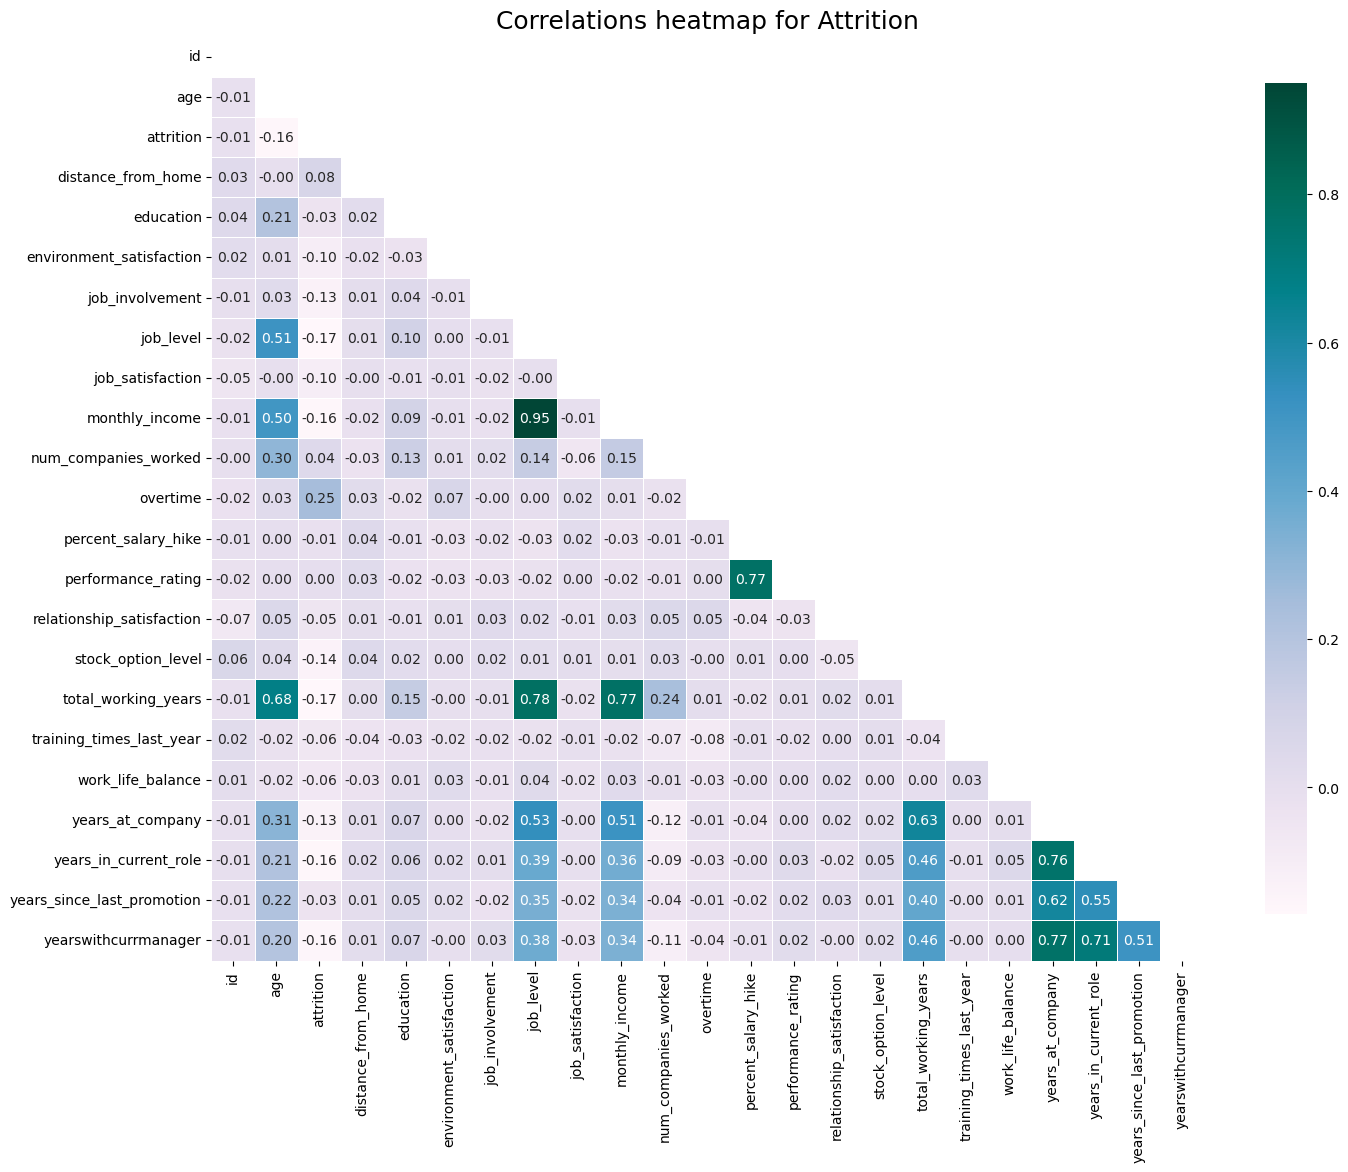

In [94]:
# get the correlation of quantitative values in the dataset
corr = df_numerical.corr()

# use numpy function to mask the data to create a matrix of booleans
ones = np.ones_like(corr, dtype='bool') # by default returns ones for all the data

# use another numpy function to get just the upper triangle of the boolean array
mask = np.triu(ones)

# Plot a customized heatmap of correlations for all numeric values
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='PuBuGn', linewidths=.6, cbar_kws={'shrink':.9})
ax.xaxis.tick_bottom()
plt.title("Correlations heatmap for Attrition", fontdict={'fontsize': 18}, loc='center') # Title, fontsize and location of title.
plt.show();

Some observations with respect to the attrition column, 
- Overtime is most positively correlated with attrition with 0.25
- Distance from home is the second most positively correlated with 0.08
- The third is number of companies worked with the value of 0.04.

From the above it can be said that the three factors mostly affecting attrition from the data given are
- Overtime
- Distance from home
- Number of companies worked.

#### What is the Relationship Between Education and Monthly Income?

In [95]:
# Get the unique values of the education column.
df_analysis.education.unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

The next step is to check the average monthly income of the employees with the different educational degrees.

In [96]:
# Get the average income of employees with education of below college.
below_college_avg_income = df_analysis.query("education == 'Below College'")['monthly_income'].mean()
below_college_avg_income

5640.570588235294

In [97]:
# Get the average income of employees with college education.
college_avg_income = df_analysis.query("education == 'College'")['monthly_income'].mean()
college_avg_income

6226.645390070922

In [98]:
# Get the average income of employees with a Bachelor Degree.
bachelor_avg_income = df_analysis.query("education == 'Bachelor'")['monthly_income'].mean()
bachelor_avg_income

6517.263986013986

In [99]:
# Get the average income of employees with a Master Degree.
master_avg_income = df_analysis.query("education == 'Master'")['monthly_income'].mean()
master_avg_income

6832.402010050251

In [100]:
# Get the average income of employees with a Doctorate degree.
doctor_avg_income = df_analysis.query("education == 'Doctor'")['monthly_income'].mean()
doctor_avg_income

8277.645833333334

From the above cells, the monthly income of the employees increases as the degree increases. 

To confirm this, it will be nice to view it in a chart.

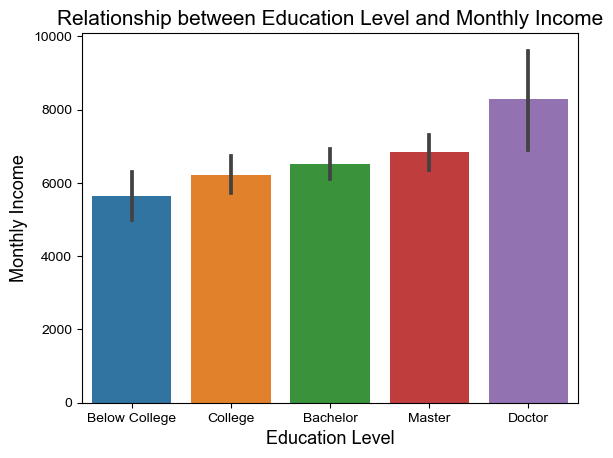

In [101]:
# Order of bar plot
plot_order = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

# Plot the barplot of education and monthly income
sns.barplot(x = 'education', y = 'monthly_income', data = df_analysis, order=plot_order)

# Set figure size
sns.set(rc={'figure.figsize':(12,6)})
plt.title("Relationship between Education Level and Monthly Income",fontsize=15) # Sets the title
plt.xlabel('Education Level',fontsize=13) # Sets the x-axis label and the fontsize of the label
plt.ylabel("Monthly Income",fontsize= 13); # Sets the y-axis label and the fontsize of the label

From the above, we can see that the higher the level of education, the higher the monthly income of an employee.

Let's check how this affects the attrition of an employee.

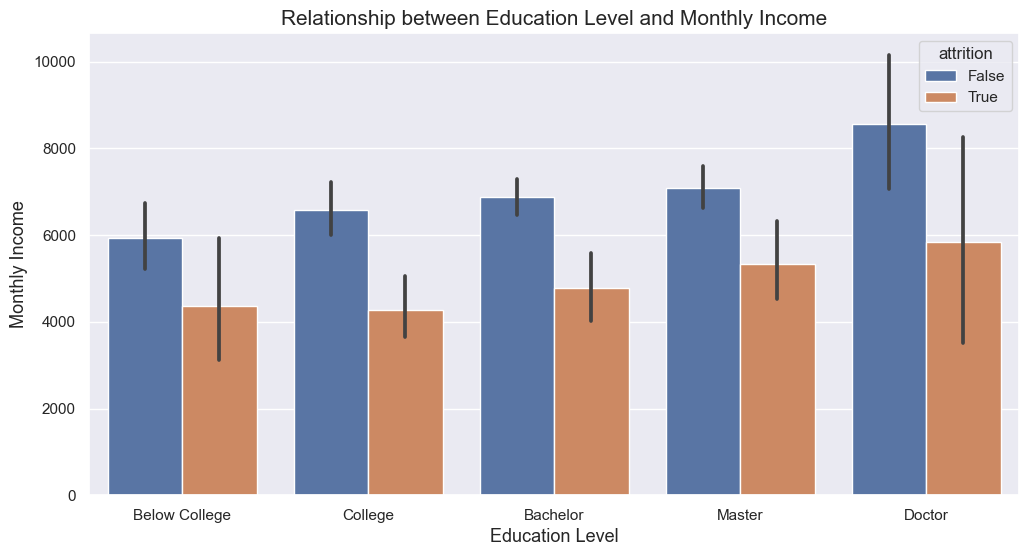

In [102]:
# Order of the barplot
plot_order = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

# Plot a seaborn bar chart
sns.barplot(x = 'education', y = 'monthly_income', hue = 'attrition',data = df_analysis, order=plot_order)
sns.set(rc={'figure.figsize':(16,8)}) # Sets the figure size
plt.title("Relationship between Education Level and Monthly Income",fontsize=15) # Sets the title and fontsize of the title
plt.xlabel('Education Level',fontsize=13) # Sets the x-axis label and the fontsize of the label
plt.ylabel("Monthly Income",fontsize= 13); # Sets the y-axis label and the fontsize of the label

From the chart above, it is seen that the monthly income of those that left the company is lower than those that stayed at the company in terms of their degree. This might be a factor in those leaving.

From the charts above, 
- The monthly income reflects the level of degree of an employee.
- The higher the degree, the higher the monthly income.
- The monthly income of those that left are lower than the monthly income of their colleagues with the same degree.

**Conclusion.**  
- The monthly income reflects the level of degree of an employee. The higher the degree, the higher the monthly incom  
- The monthly income of those that left are lower than the monthly income of their colleagues with the same degree.

**Limitation**  
- The count of those that stayed are more than 5 times those that left.
- There might be other factors that lead to some employees leaving.

#### What is the effect of age on Attrition?

In [103]:
# Summary statistic of those that stayed
age_stayed = df_analysis.query('attrition == False')['age'].describe()
age_stayed

count    1233.000000
mean       37.561233
std         8.888360
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

Looking at the summary statistics of both those that stayed and left, 
- One notable thing is that those that stayed are more than 5 times those that left.

In [104]:
df_stayed = df_analysis.query('attrition == False')
df_stayed.head(2)

,id,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,yearswithcurrmanager
1,2,49,False,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,...,Oustanding,Oustanding,1,10,3,Better,10,7,1,7
3,4,33,False,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,Excellent,0,8,3,Better,8,7,3,0


In [105]:
# Summary statistics of thos that left the company
age_left = df_analysis.query('attrition == True')['age'].describe()
age_left

count    237.000000
mean      33.607595
std        9.689350
min       18.000000
25%       28.000000
50%       32.000000
75%       39.000000
max       58.000000
Name: age, dtype: float64

In [106]:
df_left = df_analysis.query('attrition == True')
df_left.head(2)

,id,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,yearswithcurrmanager
0,1,41,True,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
2,3,37,True,Travel_Rarely,Research & Development,2,College,Other,Very High,Male,...,Excellent,Good,0,7,3,Better,0,0,0,0


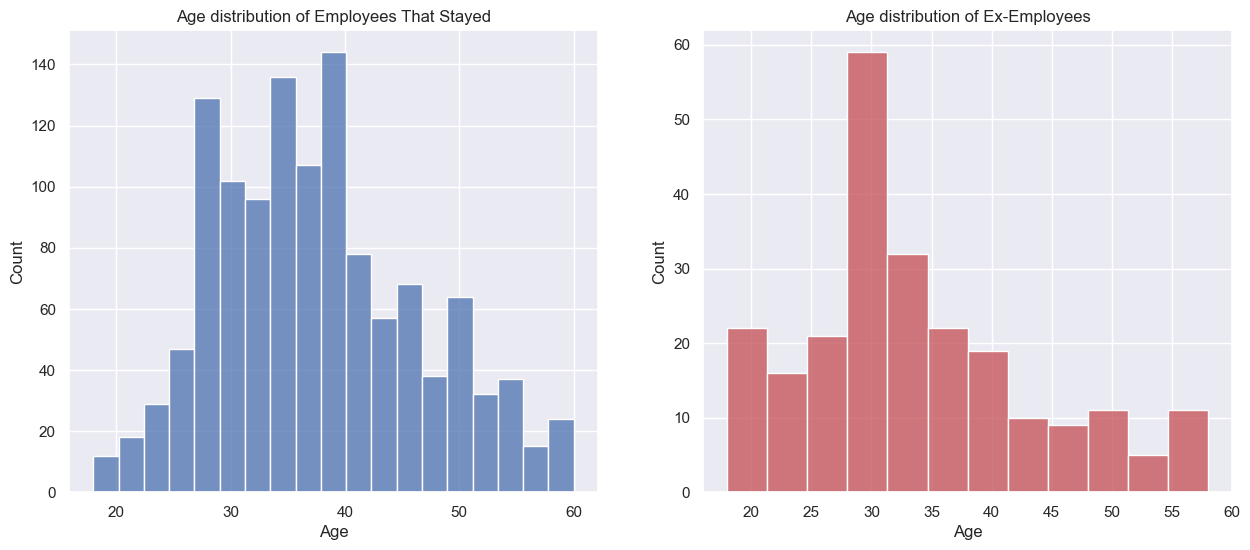

In [107]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot
# Sets the title and the x-axis label
sns.histplot(data=df_stayed, x="age", color='b', ax=axes[0]).set(title="Age distribution of Employees That Stayed", xlabel='Age')

# Second plot
# Sets the title and the x-axis label
sns.histplot(data=df_left, x="age", color='r', ax=axes[1]).set(title="Age distribution of Ex-Employees", xlabel='Age');

From the charts above, 
- The distribution of employee that stayed look like a normal distribution
- While the distribution of the employees that left is right skewed.
- More of those that left are younger than 35.
- More of those that stayed are older than 35.

**Conclusion.**  
- More of those that left are younger than 35 and more of those that stayed are older than 35.  
- This does not mean those that are younger than 35 are more likely to leave than those older than 35 as other factors might affect attrition rate.

**Limitation**  
- The count of those that stayed are more than 5 times those that left.

#### Is Income the main factor in employee attrition?

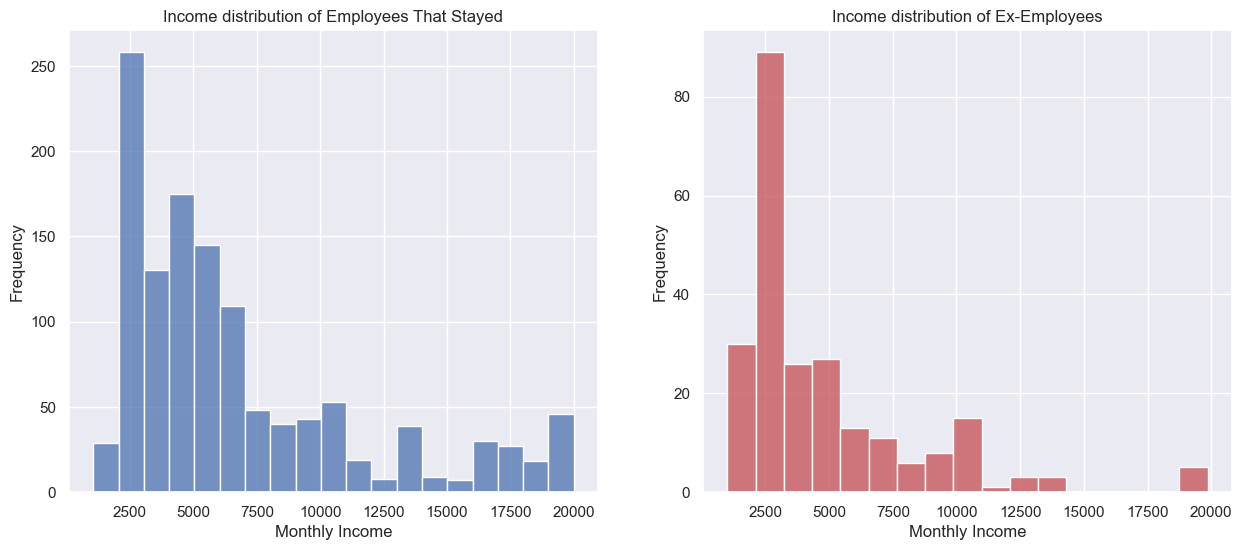

In [108]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot
# Sets the title of the plot, the x-axis and y-axis labels
sns.histplot(data=df_stayed, x="monthly_income", color='b', ax=axes[0]).set(title="Income distribution of Employees That Stayed", xlabel='Monthly Income', ylabel='Frequency')

# Second plot
# Sets the title of the plot, the x-axis and y-axis labels
sns.histplot(data=df_left, x="monthly_income", color='r', ax=axes[1]).set(title="Income distribution of Ex-Employees", xlabel='Monthly Income', ylabel='Frequency');

From the charts above, it can be said that income alone is not a major factor of employee attrition as both charts are right skewe.

**Limitation.**
- Adding other factors with income might lead to it being a major factor.
- The sample of employees that did not leave the company is not as much as those that are still in the company.

#### How does work-life balance impact the overall attrition rate??

In [109]:
attrition_rate = df_left.count()/df_analysis.count()
attrition_rate

id                            0.161224
age                           0.161224
attrition                     0.161224
business_travel               0.161224
department                    0.161224
distance_from_home            0.161224
education                     0.161224
education_field               0.161224
environment_satisfaction      0.161224
gender                        0.161224
job_involvement               0.161224
job_level                     0.161224
job_role                      0.161224
job_satisfaction              0.161224
marital_status                0.161224
monthly_income                0.161224
num_companies_worked          0.161224
overtime                      0.161224
percent_salary_hike           0.161224
performance_rating            0.161224
relationship_satisfaction     0.161224
stock_option_level            0.161224
total_working_years           0.161224
training_times_last_year      0.161224
work_life_balance             0.161224
years_at_company         

The attrition rate is 0,161 which is approximately 16%

In [110]:
# Unique values in the work life balance column
df_analysis.work_life_balance.unique()

array(['Bad', 'Better', 'Good', 'Best'], dtype=object)

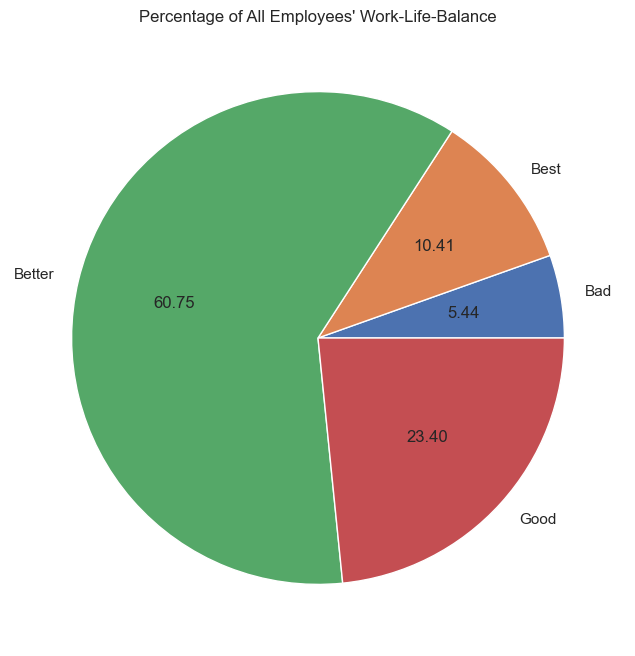

In [111]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# Plots the pie chart
df_analysis.groupby('work_life_balance').size().plot(kind='pie',autopct='%.2f')
sns.set(rc={'figure.figsize':(10,6)}) # Sets the figure size
plt.title("Percentage of All Employees' Work-Life-Balance") # Title of the chart
plt.ylabel("") # Removes "None" from the y-axis.
plt.show();

From the above chart, it can be seen that
- The percentage of employess that have a bad work-life-balance is 5.44 percent.
- Majority of employess has a work-life-balance of better.
- Only 10.41% of employees says their work-life-balance is in the best shape.


The next charts will try to compare the work-life-balance of the employees that left and those that stayed.

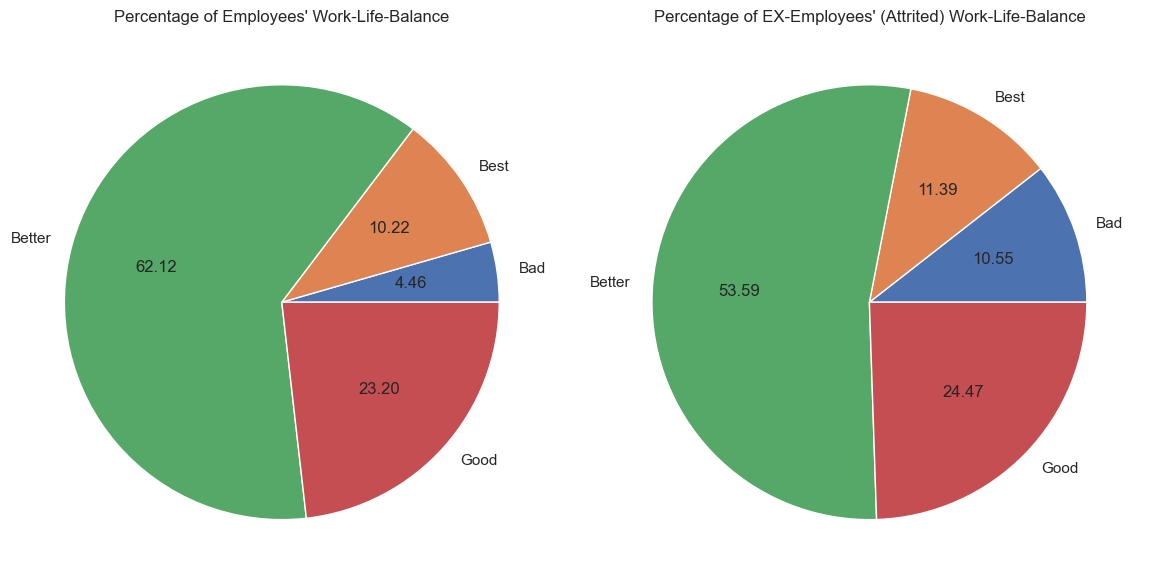

In [112]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# Define plotting region (2 rows, 2 columns)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plots the first pie chart
# Sets the kind of plot, the percentage to round up to and position of chart
df_stayed.groupby('work_life_balance').size().plot(kind='pie',autopct='%.2f', ax=ax1)
ax1.set_title("Percentage of Employees' Work-Life-Balance") # Title of plot.
ax1.set_ylabel('') # Removes "None" from y-axis
plt.tight_layout() # Make subplot fit into the figure size

# Plots the first pie chart
# Sets the kind of plot, the percentage to round up to and position of chart
df_left.groupby('work_life_balance').size().plot(kind='pie',autopct='%.2f', ax=ax2)
ax2.set_title("Percentage of EX-Employees' (Attrited) Work-Life-Balance") # Title of plot.
ax2.set_ylabel('', size=22) # Removes "None" from y-axis
plt.tight_layout() # Make subplot fit into the figure size
plt.show() # Shows plot

Comparing both charts above, we observe that
- Under 5% of employees that stayed have bad work-life-balance is bad, while more than 10% of employees that left have a bad work-life-balance.
- Over half of the employees in both groups, those that stayed behind and those that left have either good, better or best work-life-balance, Over 95% of those that are still employed by the company and just under 90% of those that no longer work at the company.
- Work-life-balance seems to not really factor in the attrition rate of the company.

<a id='limit'></a>
<h2 style="text-align: center;">Limitations</h2>

In this section, some limitations of the data are listed.

Some limitations include
- Other factors can affect employee attrition which are not given in the dataset, some are
    - Death
    - Retirement
    - Relocation of employees
    - Change of career field of employees etc.
- Multiple factors acting together can lead to employee attrition as most of the analysis was based on one factor at a time.
- Not all columns were individually analyzed.
- Last but not least, `correlation does not imply causation`.

<a id='conclusions'></a>
<h2 style="text-align: center;">Conclusions</h2>


In this section, some conclusions based on the analysis done are listed.

- The three main factors affecting attrition based on the dataset are;
     - Ovetime.
     - Distance from home.
     - Number of employees worked for.
- Work life balance do not seem to affect employee attrition, however the ex employees have a higher rate of `bad` work life balance than the current employees.
- Income alone is not a factor of employee attrition.
- The higher the education level the higher the monthly income.
- However, the average monthly income of the ex-employees are lower than the average monthly income of their colleagues with the same degree.